¡Hola Jorge! Como te va?

Mi nombre es Facundo Lozano! Un gusto conocerte, seré tu revisor en este proyecto.

A continuación un poco sobre la modalidad de revisión que usaremos:

Cuando enccuentro un error por primera vez, simplemente lo señalaré, te dejaré encontrarlo y arreglarlo tú cuenta. Además, a lo largo del texto iré haciendo algunas observaciones sobre mejora en tu código y también haré comentarios sobre tus percepciones sobre el tema. Pero si aún no puedes realizar esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a comentarios y discusiones sobre el tema.

Encontrará mis comentarios a continuación: **no los mueva, modifique ni elimine**.

Puedes encontrar mis comentarios en cuadros verdes, amarillos o rojos como este:

<div class="alert alert-block alert-success">
<b>Comentario del revisor.</b> <a class="tocSkip"></a>

Exito. Todo se ha hecho de forma exitosa.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor.</b> <a class="tocSkip"></a>

Observación. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor.</b> <a class="tocSkip"></a>

Necesita arreglos. Este apartado necesita algunas correcciones. El trabajo no puede ser aceptado con comentarios rojos. 
</div>

Puedes responder utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta de estudiante.</b> <a class="tocSkip"></a>
</div>

## Inicialización

<div class="alert alert-block alert-success">
<b>Review General. (Iteración 1) </b> <a class="tocSkip"></a>

Jorge, quería tomarme este tiempo al inicio de tu proyecto para comentarte mis apreciaciones generales de esta iteración de tu entrega.

Siempre me gusta comenzar dando la bienvenida al mundo de los datos a los estudiantes, te deseo lo mejor y espero que consigas lograr tus objetivos. Personalmente me gusta brindar el siguiente consejo, "Está bien equivocarse, es normal y es lo mejor que te puede pasar. Aprendemos de los errores y eso te hará mejor programador ya que podrás descubrir cosas a medida que avances y son estas cosas las que te darán esa experiencia para ser un gran cientifico de datos."
    
Ahora si yendo a esta notebook. Jorge, lo he dicho al final del proyecto pero lo resalto aquí nuevamente, tu proyecto está muy bien resuelto, resalta capacidad y comprensión de todas las herrramientas, como a la vez esta ordenado y es sencillo de seguir, felictiaciones! En general has aplicado todo lo que se buscaba aplicar e incluso has agregado conclusiones muy completas, muy bien hecho!

Este proyecto está en condiciones de ser aprobado! Éxitos dentro de tu camino en el mundo de los datos!

Saludos Jorge!

In [1]:
#Cargar bibliotecas
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

Se establecen las bibliotecas y herramientas necesarias para el proyecto.

## Carga los datos

El conjunto de datos se almacena en la carpeta `/datasets/faces/` 
- La carpeta `final_files` con 7600 fotos 
- El archivo `labels.csv` con etiquetas, con dos columnas: `file_name` y `real_age` 
Dado que el número de archivos de imágenes es bastante elevado, se recomienda evitar leerlos todos a la vez, ya que esto consumiría muchos recursos computacionales. Te recomendamos crear un generador con ImageDataGenerator. Este método se explicó en el capítulo 3, lección 7 de este curso.

El archivo de etiqueta se puede cargar como un archivo CSV habitual.

In [2]:
#Generador de datos
datagen = ImageDataGenerator()

Creamos un generador de datos de imágenes utilizando la clase ImageDataGenerator de TensorFlow Keras.

In [3]:
#Cargar el conjunto de datos
datagen_flow = datagen.flow_from_dataframe(
    dataframe=pd.read_csv('/datasets/faces/labels.csv'),
    directory='/datasets/faces/final_files',
    x_col='file_name',
    y_col='real_age',
    target_size=(150,150),  
    batch_size=16,
    class_mode='raw',
    seed=88,
    verbose=0
)

Found 7591 validated image filenames.


<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Hasta aquí excelente Jorge, una importación de librerías perfecfta por separado de la carga de los datos realizadaas junto al ImageDataGenerator.

Cargamos las imágenes y las etiquetas desde un DataFrame de pandas y creamos un generador de flujo de datos que proporciona lotes de datos de imágenes y etiquetas para el entrenamiento de un modelo de aprendizaje profundo

## EDA

In [4]:
#Observar el tamaño de conjunto de datos
tamaño_conjunto_datos = datagen_flow.n

print("Tamaño del conjunto de datos:", tamaño_conjunto_datos)

Tamaño del conjunto de datos: 7591


Cargamos el numero de imagenes del conjunto de datos.

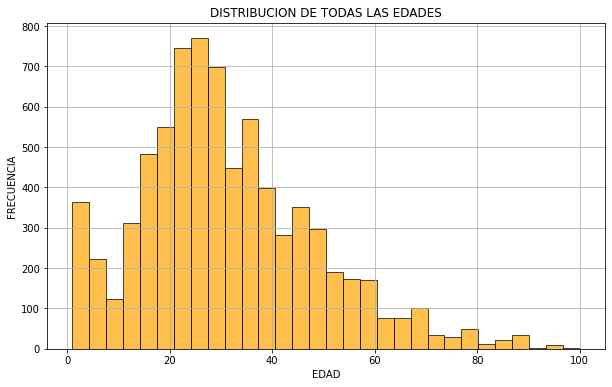

In [5]:
#Explorar la distribución de edad en el conjunto de datos
edades = datagen_flow.labels

plt.figure(figsize=(10, 6))
plt.hist(edades, bins=30, color='orange', edgecolor='black', alpha=0.7)
plt.title('DISTRIBUCION DE TODAS LAS EDADES')
plt.xlabel('EDAD')
plt.ylabel('FRECUENCIA')
plt.grid(True)
plt.show()
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Perfecto! Tal como se debía has calculado la frecuencia de las edades y como agregado craeste grupos que juntaron dichas edades para comprender esta distribución de mejor forma. Impresionante Jorge!

Creamos un histograma que muestra la distribución de las edades en el conjunto de datos

In [6]:
#Calcular la frecuencia de cada edad
distribucion_edades = pd.DataFrame(datagen_flow.labels, columns=['Edad']).value_counts().reset_index()
distribucion_edades.columns = ['Edad', 'Frecuencia']
distribucion_edades.head(10)

Edad  Frecuencia
0    30         317
1    25         315
2    27         229
3    26         226
4    28         217
5    23         213
6    24         211
7    16         193
8    18         193
9    19         180

Calculamos la frecuencia de cada edad en el conjunto de datos y luego mostramos los 10 primeros datos de la tabla con dos columnas: "Edad" y "Frecuencia", que representa la cantidad de imágenes con cada edad

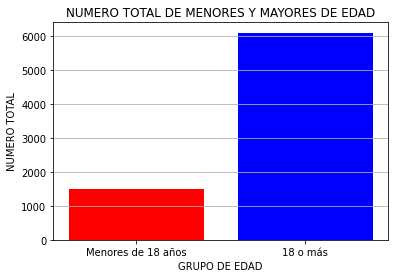

In [7]:
#Contar el numero total de fotografias de menores y mayores de edad
total_menores_edad = sum(edad < 18 for edad in edades)
total_mayores_edad = sum(edad >= 18 for edad in edades)

categorias = ['Menores de 18 años', '18 o más']
frecuencias = [total_menores_edad, total_mayores_edad]

plt.figure(figsize=(6, 4))
plt.bar(categorias, frecuencias, color=['red', 'blue'])
plt.title('NUMERO TOTAL DE MENORES Y MAYORES DE EDAD')
plt.xlabel('GRUPO DE EDAD')
plt.ylabel('NUMERO TOTAL')
plt.grid(axis='y')
plt.show()

Calculamos el número total de edades menores de 18 y mayores o iguales a 18, y luego trazamos un histograma con dos barras, una para el número total de menores de edad y otra para el número total de mayores de edad.

In [8]:
#Contar el número total de menores de edad y mayores de edad
total_menores_edad = sum(edad < 18 for edad in edades)
total_mayores_edad = sum(edad >= 18 for edad in edades)

datos = {'Grupo de Edad': ['Menores de 18', '18 o más'],
         'Número Total': [total_menores_edad, total_mayores_edad]}
tabla_edades = pd.DataFrame(datos)
tabla_edades

Grupo de Edad  Número Total
0  Menores de 18          1503
1       18 o más          6088

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Un agregado perfecto, bien hecho Jorge!

Calculamos el número total de edades menores de 18 y mayores o iguales a 18, creamos y mostramos un DataFrame con estos datos

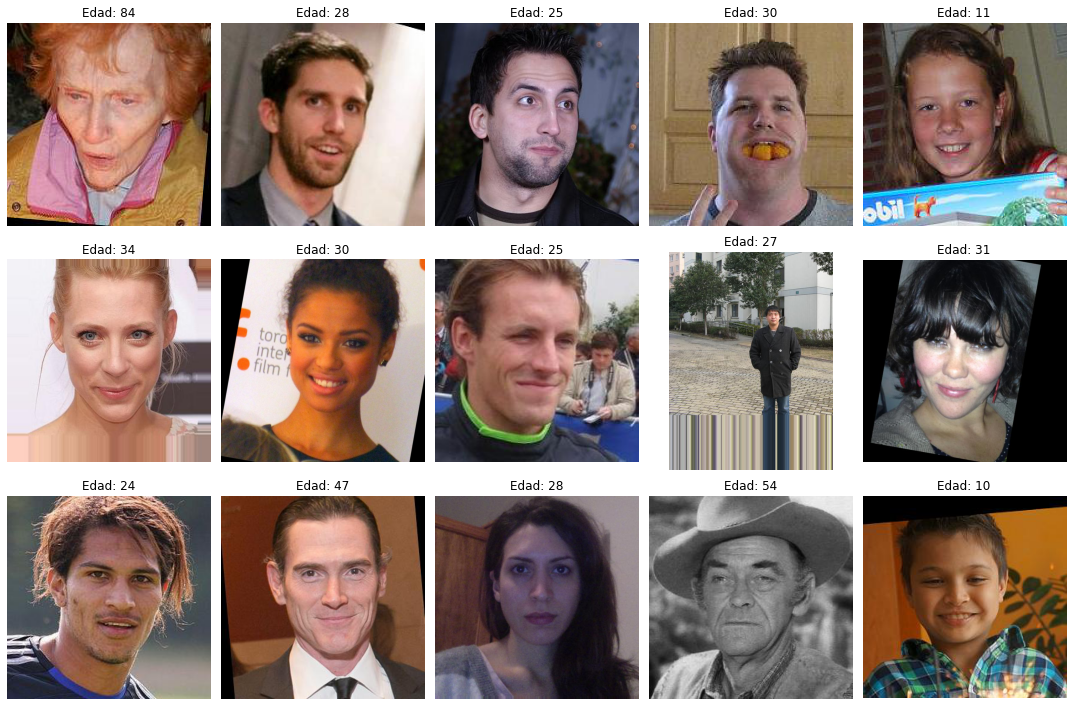

In [9]:
#Obtener las edades y las rutas de las imágenes del conjunto de datos
edades = datagen_flow.labels
rutas_imagenes = datagen_flow.filepaths

#Seleccionar aleatoriamente 15 imágenes y sus respectivas edades
indices_seleccionados = np.random.choice(len(edades), 15, replace=False)
rutas_seleccionadas = [rutas_imagenes[idx] for idx in indices_seleccionados]
edades_seleccionadas = [edades[idx] for idx in indices_seleccionados]

#Mostrar las imágenes en una cuadrícula con sus respectivas edades
plt.figure(figsize=(15, 10))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    imagen = plt.imread(rutas_seleccionadas[i])
    plt.imshow(imagen)
    plt.title(f"Edad: {edades_seleccionadas[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Excelente visualización de las imagenes con las que trabajaremos, felicitaciones!

Seleccionamos aleatoriamente 15 imágenes del conjunto de datos y obtuvimos sus rutas y edades correspondientes. Luego, estas imágenes las mostramos en una cuadrícula de 3x5 junto con sus edades en los títulos

### Conclusiones

Cargamos el conjunto de datos y observamos que tenemos un conjunto de 7591 fotografias de personas con sus respetivas edades. Explorando la distribución de edad en el conjunto de datos, podemos observar que la mayoria de las fotografias son de personas que son mayores de edad (18 años o mas) con un total de 6088 imagenes, representando el 80% del conjunto de datos, y con un total de 1503 imagenes de menores de edad. Tambien podemos ver que la edad con el mayor numero de imagenes es de 30 años con 317, le sigue la edad de 25 con 315 y en tercer lugar es la de 27 años con 229 imagenes. Para una mejor visualizacion de los datos, imprimimos 15 imagenes aleatoriamente.

## Modelado

Define las funciones necesarias para entrenar tu modelo en la plataforma GPU y crea un solo script que las contenga todas junto con la sección de inicialización.

Para facilitar esta tarea, puedes definirlas en este notebook y ejecutar un código listo en la siguiente sección para componer automáticamente el script.

Los revisores del proyecto también verificarán las definiciones a continuación, para que puedan comprender cómo construiste el modelo.

In [10]:
def load_train(path):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.25,
        #horizontal_flip=True,
        #vertical_flip=True,
        #width_shift_range=0.2,
        #height_shift_range=0.2,
        #rotation_range=90
    )

    train_df = pd.read_csv(path + 'labels.csv')
    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=train_df,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(150, 150),
        batch_size=16,
        class_mode='raw',
        subset='training',
        seed=88
    )

    return train_gen_flow

Creamos una función llamada **load_train** para poder cargar y preprocesar datos de entrenamiento para un modelo de aprendizaje automático basado en imágenes

Creamos en la funcion un generador de datos de imágenes utilizando **ImageDataGenerator**, que aplica diversas transformaciones de aumento de datos como reescalado y división de validación.

- **rescale:** Escala los valores de píxeles de las imágenes al rango [0,1] dividiendo cada píxel por 255.
- **validation_split:** Divide automáticamente los datos en entrenamiento y validación. En este caso, el 25% de los datos se reservarán para validación.

Leemos un archivo CSV que contiene información sobre las imágenes, como los nombres de los archivos y las edades reales.

Utilizamos el método **flow_from_dataframe** del generador de datos de imágenes para cargar y procesar las imágenes desde el dataframe. Algunos de los parámetros importantes son:

- **dataframe:** El dataframe que contiene la información de las imágenes.
- **directory:** La ruta al directorio que contiene las imágenes.
- **x_col:** El nombre de la columna que contiene los nombres de archivo de las imágenes.
- **y_col:** El nombre de la columna que contiene las edades reales.
- **target_size:** El tamaño al que se redimensionarán todas las imágenes.
- **batch_size:** El tamaño del lote de imágenes que se utilizará durante el entrenamiento.
- **class_mode:** Define cómo se devuelven las etiquetas. En este caso, se establece en 'raw' para devolver las edades reales directamente.
- **seed:** Semilla para la aleatorización y el fraccionamiento del conjunto de datos.

In [11]:
def load_test(path):
    test_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.25
    )

    test_df = pd.read_csv(path + 'labels.csv')
    test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe=test_df,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(150, 150),
        batch_size=16,
        class_mode='raw',
        subset='validation',
        seed=88
    )

    return test_gen_flow


<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Muy buen armadas las funciones, aquí podríamos probar diferentes valores del lote para observar si hay mejoras de eficiencia en los modelos. Sigamos!

Creamos una función llamada **load_test** con las mismas especificaciones que la funcion de load_train para poder cargar y preprocesar datos de prueba para un modelo de aprendizaje automático basado en imágenes. 

In [12]:
def create_model(input_shape=(150, 150, 3)):
    backbone = ResNet50(
        input_shape=input_shape, weights='imagenet', include_top=False
    )

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu')) 
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error', metrics=['mean_absolute_error'])
    
    return model

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Excelente creación de modelo Jorge, en primera instancia implementando el modelo sugerido Resnet50, y luego creando la estructura del modelo aplicando tanto capas como el optimizador y compilando. Si quisiéramos mejorar y ver diferentes resultados podríamos variar los valores del dropout o del learning_rates.

Construimos una función llamada `create_model` que crea un modelo de red neuronal utilizando la arquitectura pre-entrenada ResNet50 como columna vertebral. Aquí está el resumen:

1. **Inicialización del modelo**: Se inicializa un modelo secuencial de Keras.

2. **Agregando ResNet50 como columna vertebral**: Se añade ResNet50 pre-entrenada al modelo secuencial, excluyendo la capa de clasificación final.

3. **Agregando capas adicionales**: Se añade una capa de agrupación global promedio para reducir la dimensionalidad de las características y luego una capa densa de salida con una neurona y activación ReLU para predecir la edad.

4. **Compilación del modelo**: Se compila el modelo con el optimizador Adam, la función de pérdida de error cuadrático medio y la métrica de evaluación de error absoluto medio.

5. **Retorno del modelo**: Se devuelve el modelo compilado, que puede ser utilizado para entrenar y hacer predicciones sobre imágenes de entrada.

In [13]:
def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):

    model.fit(
        train_data,
        epochs=epochs,
        batch_size=batch_size,
        steps_per_epoch=steps_per_epoch,
        validation_data=test_data,
        validation_steps=validation_steps,
        verbose=2
    )

    return model


<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Un armado perfecto Jorge, bien hecho! Aquí podríamos agregar al inicio la línea **%%time** para obser el tiempo que demora esta ejecución.

Construimos la función `train_model` que entrena un modelo de red neuronal utilizando datos de entrenamiento y validación. Aquí está el resumen:

1. **Argumentos de entrada**: La función recibe el modelo a entrenar (`model`), los datos de entrenamiento (`train_data`) y los datos de validación (`test_data`). También puede recibir el tamaño del lote (`batch_size`), el número de épocas de entrenamiento (`epochs`), y los pasos por época de entrenamiento y validación (`steps_per_epoch` y `validation_steps`, respectivamente).

2. **Entrenamiento del modelo**: Utiliza el método `fit` del modelo para entrenar con los datos de entrenamiento y validación especificados, con los parámetros dados. El entrenamiento se realiza de forma verbose (`verbose=2`), lo que muestra información sobre el progreso del entrenamiento en la salida.

3. **Retorno del modelo entrenado**: Una vez que el entrenamiento se completa, la función devuelve el modelo entrenado.


## Prepara el script para ejecutarlo en la plataforma GPU

Una vez que hayas definido las funciones necesarias, puedes redactar un script para la plataforma GPU, descargarlo a través del menú "File|Open..." (Archivo|Abrir) y cargarlo más tarde para ejecutarlo en la plataforma GPU.

Nota: el script debe incluir también la sección de inicialización. A continuación se muestra un ejemplo.

In [14]:
#Preparar un script para ejecutarlo en la plataforma GPU

init_str = """
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
"""

import inspect

with open('run_model_on_gpu.py', 'w') as f:
    
    f.write(init_str)
    f.write('\n\n')
        
    for fn_name in [load_train, load_test, create_model, train_model]:
        
        src = inspect.getsource(fn_name)
        f.write(src)
        f.write('\n\n')

Creamos un script que genera un archivo Python separado que contiene las funciones necesarias para cargar datos, construir un modelo de red neuronal utilizando ResNet50 y entrenarlo en una plataforma GPU. Esto facilita la ejecución del código en un entorno GPU.







### El resultado

Coloca el resultado de la plataforma GPU como una celda Markdown aquí.

Train for 356 steps, validate for 119 steps

Epoch 1/20
356/356 - 61s - loss: 219.6824 - mean_absolute_error: 10.7939 - val_loss: 688.9285 - val_mean_absolute_error: 21.2450

Epoch 2/20
356/356 - 35s - loss: 73.4165 - mean_absolute_error: 6.5498 - val_loss: 139.4214 - val_mean_absolute_error: 8.9913

Epoch 3/20
356/356 - 35s - loss: 36.9955 - mean_absolute_error: 4.7059 - val_loss: 84.8132 - val_mean_absolute_error: 7.0112

Epoch 4/20
356/356 - 35s - loss: 22.1815 - mean_absolute_error: 3.6329 - val_loss: 80.3225 - val_mean_absolute_error: 6.9396

Epoch 5/20
356/356 - 35s - loss: 15.7094 - mean_absolute_error: 3.0474 - val_loss: 80.0381 - val_mean_absolute_error: 6.6543

Epoch 6/20
356/356 - 35s - loss: 13.4390 - mean_absolute_error: 2.7948 - val_loss: 76.8687 - val_mean_absolute_error: 6.5937

Epoch 7/20
356/356 - 35s - loss: 12.0057 - mean_absolute_error: 2.6442 - val_loss: 73.3882 - val_mean_absolute_error: 6.5385

Epoch 8/20
356/356 - 35s - loss: 10.6833 - mean_absolute_error: 2.4882 - val_loss: 73.7319 - val_mean_absolute_error: 6.4727

Epoch 9/20
356/356 - 35s - loss: 9.7587 - mean_absolute_error: 2.3663 - val_loss: 74.2732 - val_mean_absolute_error: 6.4490

Epoch 10/20
356/356 - 35s - loss: 9.1470 - mean_absolute_error: 2.2686 - val_loss: 71.4266 - val_mean_absolute_error: 6.3391

Epoch 11/20
356/356 - 35s - loss: 9.4381 - mean_absolute_error: 2.3186 - val_loss: 80.0079 - val_mean_absolute_error: 6.9276

Epoch 12/20
356/356 - 35s - loss: 9.8570 - mean_absolute_error: 2.3786 - val_loss: 70.7600 - val_mean_absolute_error: 6.2449

Epoch 13/20
356/356 - 35s - loss: 9.7028 - mean_absolute_error: 2.3555 - val_loss: 75.4192 - val_mean_absolute_error: 6.6393

Epoch 14/20
356/356 - 35s - loss: 9.2993 - mean_absolute_error: 2.3094 - val_loss: 74.5177 - val_mean_absolute_error: 6.3628

Epoch 15/20
356/356 - 35s - loss: 8.3542 - mean_absolute_error: 2.1789 - val_loss: 70.7268 - val_mean_absolute_error: 6.4164

Epoch 16/20
356/356 - 35s - loss: 7.5183 - mean_absolute_error: 2.0775 - val_loss: 73.4506 - val_mean_absolute_error: 6.6335

Epoch 17/20
356/356 - 35s - loss: 7.3558 - mean_absolute_error: 2.0451 - val_loss: 77.8219 - val_mean_absolute_error: 6.4210

Epoch 18/20
356/356 - 35s - loss: 10.7819 - mean_absolute_error: 2.4342 - val_loss: 94.6464 - val_mean_absolute_error: 7.5012

Epoch 19/20
356/356 - 35s - loss: 10.4436 - mean_absolute_error: 2.4412 - val_loss: 73.3085 - val_mean_absolute_error: 6.4499

Epoch 20/20
356/356 - 35s - loss: 7.1618 - mean_absolute_error: 2.0201 - val_loss: 66.4912 - val_mean_absolute_error: 6.2375


119/119 - 9s - loss: 66.4912 -mean_absolute_error: 6.2375

**Test MAE: 6.2375**

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Muy bien hecho Jorge, hemos podido correr el modelo y hemos obtenido muy buenos resultados, felicitaciones!

## Conclusiones


Con el conjunto de datos proporcionado de fotografias de personas con sus respectivas edades, creamos funciones para entrenar un modelo y predecir las edades de las personas, obteniendo los siguientes resultados:

1. **Entrenamiento del Modelo**:
   - Se entrenó un modelo de red neuronal durante 20 épocas.
   - Se utilizaron 356 pasos de entrenamiento y 119 pasos de validación por época.
   - Durante el entrenamiento, la pérdida y el error absoluto medio (MAE) disminuyeron en cada época tanto en los datos de entrenamiento como en los de validación.
   - Hubo un aumento en la pérdida y el MAE en los datos de validación después de la época 18, lo que sugiere un posible sobreajuste.


2. **Resultados Finales**:
   - Después del entrenamiento, el modelo se evaluó en los datos de prueba.
   - Se encontró que el MAE en los datos de prueba fue de aproximadamente 6.24.

En resumen, el modelo mostró una mejora en la pérdida y el MAE durante el entrenamiento, pero se observó un posible sobreajuste hacia el final del entrenamiento. El MAE final en los datos de prueba fue de aproximadamente 6.24, lo que indica un buen rendimiento del modelo en la tarea de predicción de edades.

<div class="alert alert-block alert-success">
<b>Comentario del revisocr. (Iteración 1)</b> <a class="tocSkip"></a>

Excelente conclusión Jorge, destaco el rendimiento exitoso del modelo y sobre todo el procedimiento aplicado. El modelo cumple con los criterios establecidos y tus conclusiones demuestran tu comprensión de lo aplicado y obtenido. Felicitaciones!